# **Trabalho Final: Paris House Classification**

Clara Cabral Lisboa

# Objetivo do trabalho

O objetivo deste trabalho é criar um modelo de machine learning capaz de classificar imóveis como "Luxury" ou "Basic" com base em diversas características numéricas do imóvel.

Para a escolha do melhor modelo iremos comparar Regressão Logística, Random Forest, Gradient Boosting, AdaBoost, K-Nearest Neighbors, Support Vector Machine e Naive Bayes.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Carregar os dados
data = pd.read_csv('ParisHousingClass99.88.csv')


# 1. Análise exploratória e Pré-processamento dos dados

In [4]:
# Estatísticas descritivas
data.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [5]:
# Verificar valores ausentes
valores_ausentes = data.isnull().sum()

# Exibir valores ausentes
print(valores_ausentes)

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64


category
Basic     7470
Luxury    2530
Name: count, dtype: int64


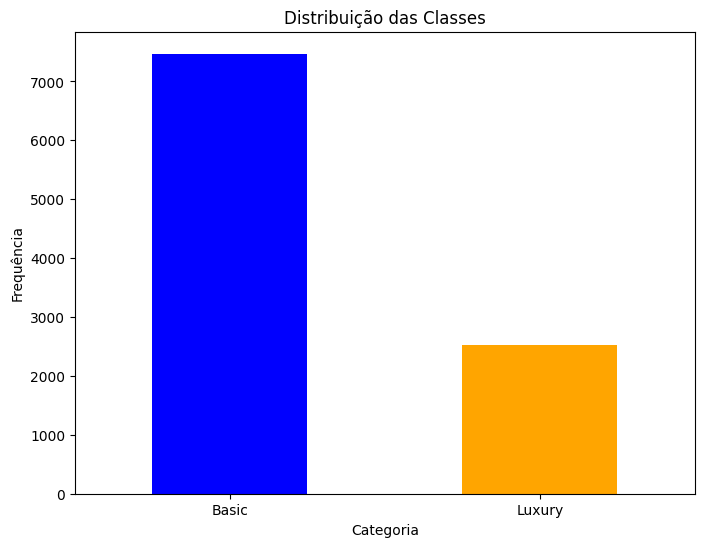

In [6]:
# Verificar balanceamento da variável alvo
class_counts = data['category'].value_counts()
print(class_counts)

# Visualizar a distribuição das classes
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribuição das Classes')
plt.xlabel('Categoria')
plt.ylabel('Frequência')
plt.xticks(rotation=0)
plt.show()

<Figure size 1500x1000 with 0 Axes>

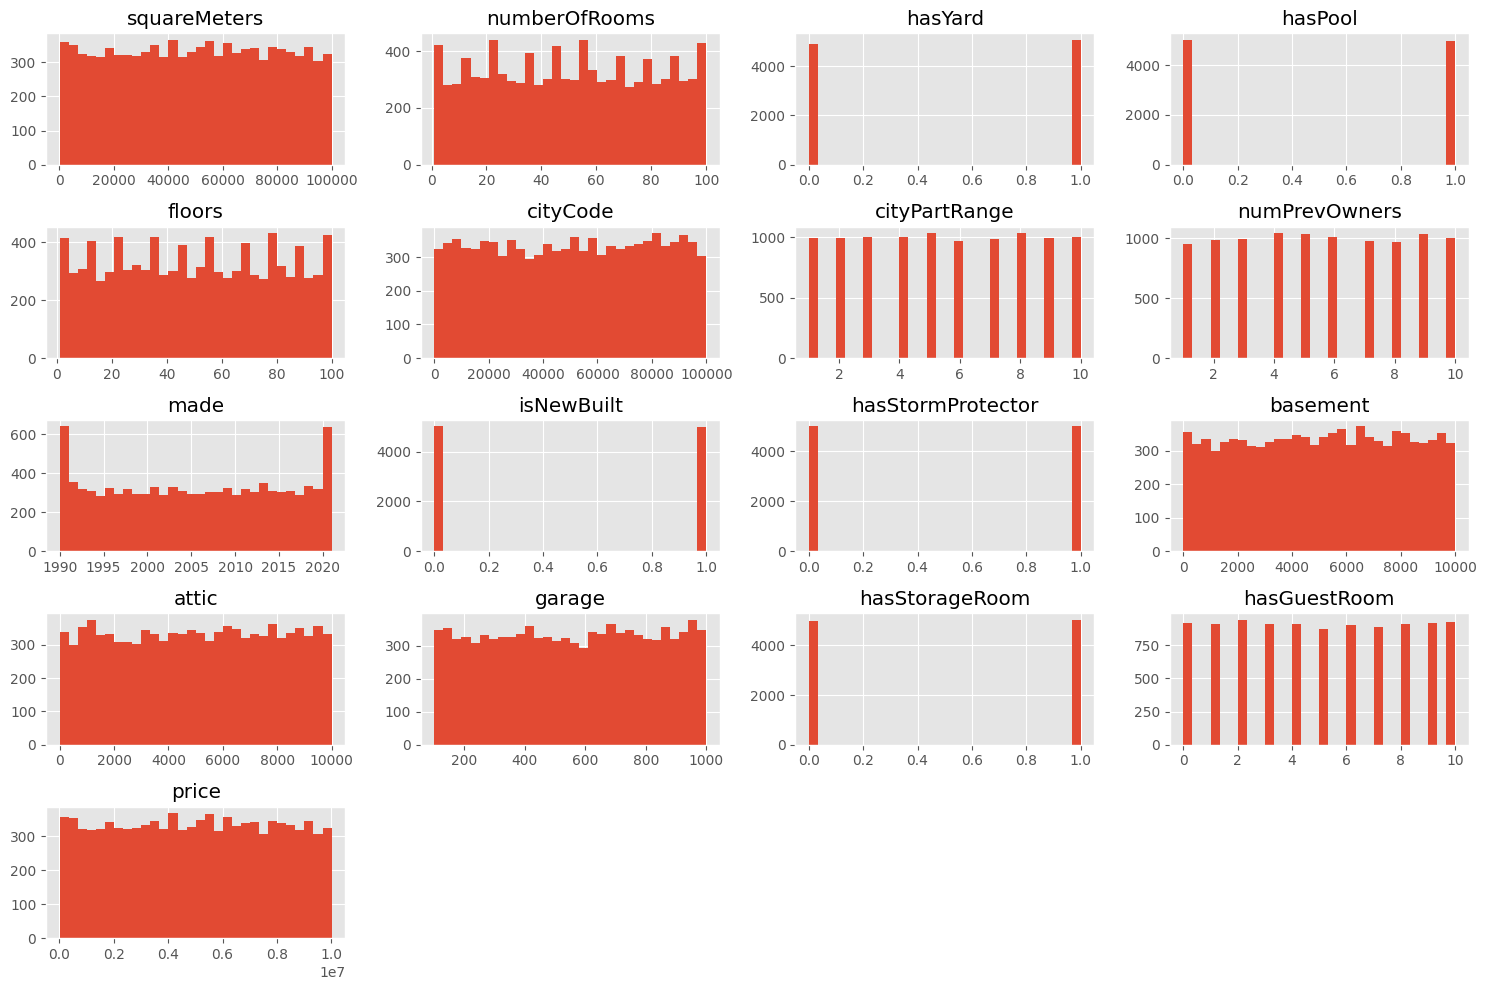

In [7]:
# Histogramas das variáveis numéricas
plt.style.use('ggplot')
plt.figure(figsize=(15, 10))
data.hist(bins=30, figsize=(15, 10), layout=(5, 4))
plt.tight_layout()
plt.show()

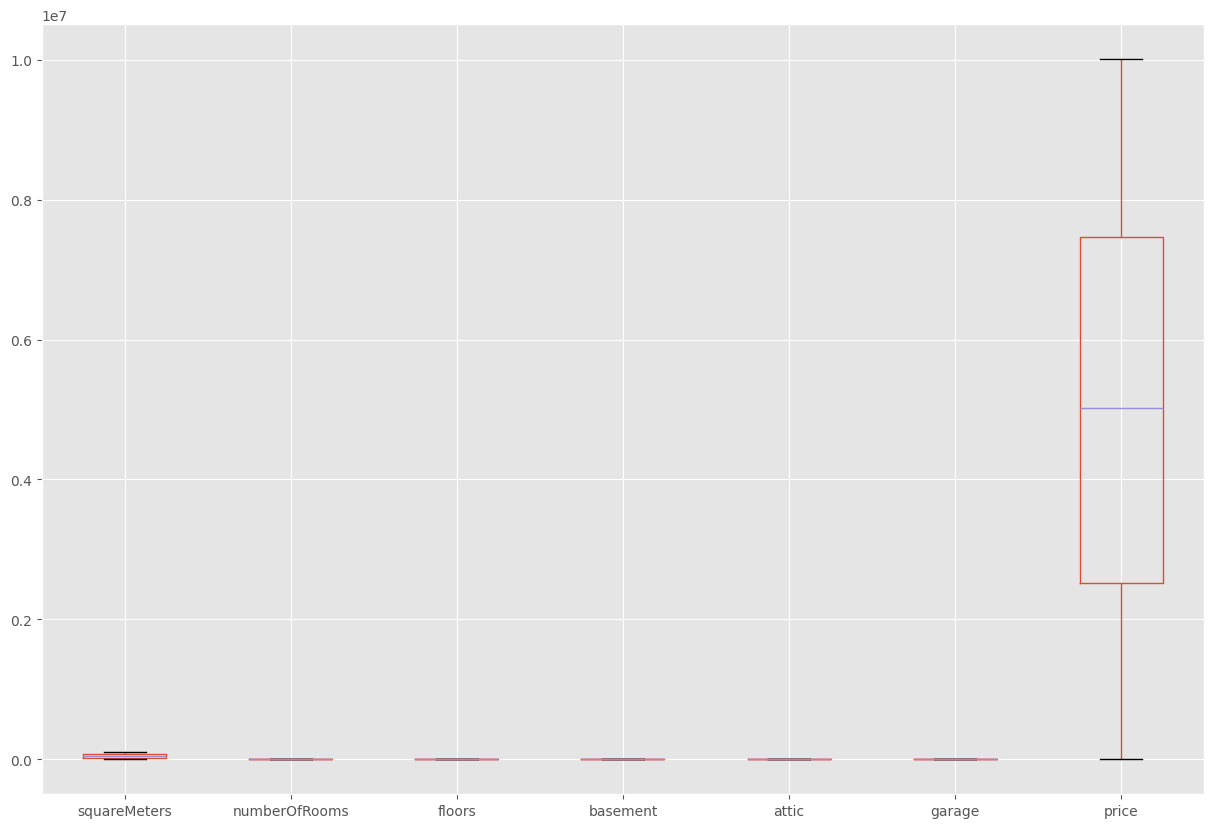

In [8]:
# Gráficos de caixa para identificar outliers
plt.figure(figsize=(15, 10))
data[['squareMeters', 'numberOfRooms', 'floors', 'basement', 'attic', 'garage', 'price']].boxplot()
plt.show()


In [9]:
# Selecionar apenas as colunas numéricas
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Remover outliers utilizando o IQR
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Definindo limites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removendo outliers
data_no_outliers = data[~((data[numeric_cols] < lower_bound) | (data[numeric_cols] > upper_bound)).any(axis=1)]

# Verificando a quantidade de dados removidos
data_no_outliers.shape, data.shape


((10000, 18), (10000, 18))

**squareMeters: Média de 49870.13 e desvio padrão de 28774.38.  
numberOfRooms: Média de 50.36 e desvio padrão de 28.82.  
price: Média de 4993448.00 e desvio padrão de 2877424.00.**
  
Utilizamos gráficos de caixa (boxplots) para identificar possíveis outliers em várias variáveis foi constatado que não outliers nem valores vazio na base

In [10]:
# Normalização/Padronização
columns_to_scale = ['squareMeters', 'numberOfRooms', 'floors', 'basement', 'attic', 'garage', 'price']
scaler = StandardScaler()
data_no_outliers[columns_to_scale] = scaler.fit_transform(data_no_outliers[columns_to_scale])


In [11]:
# Codificação one-hot da variável categórica
data_no_outliers = pd.get_dummies(data_no_outliers, columns=['category'], drop_first=True)

**Normalização/Padronização as variáveis com grande dispersão foram padronizadas utilizando StandardScaler**  
  
A padronização é essencial para assegurar que todas as variáveis numéricas tenham a mesma escala, o que é particularmente importante para algoritmos de aprendizado de máquina que são sensíveis às magnitudes das variáveis, como Regressão Logística e K-Nearest Neighbors.
  
**Codificação de Variáveis Categóricas a variável categórica category foi codificada usando a codificação one-hot**  
  
A variável categórica category foi codificada usando a codificação one-hot. Essa técnica transforma variáveis categóricas em um formato adequado para algoritmos de aprendizado de máquina, que geralmente requerem entradas numéricas. A codificação one-hot é escolhida para evitar a criação de ordens artificiais entre categorias que não têm uma relação ordinal intrínseca.

In [12]:
# Divisão dos dados em treino e teste
X = data_no_outliers.drop('category_Luxury', axis=1)
y = data_no_outliers['category_Luxury']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Divisão do Conjunto de Dados:  
Os dados foram divididos em 80% para treino e 20% para teste. Esta divisão é uma prática comum que permite avaliar a performance do modelo em dados que ele não viu durante o treinamento, proporcionando uma estimativa da capacidade de generalização do modelo.

# 2. Treinamento dos modelos e Avaliação do desempenho

Regressão Logística:

In [13]:
# Treinamento e Avaliação do Modelo de Regressão Logística
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
classification_report_log_reg = classification_report(y_test, y_pred_log_reg)
print(f'Acurácia: {accuracy_log_reg}')
print(f'Relatório de Classificação:\n{classification_report_log_reg}')

Acurácia: 0.9985
Relatório de Classificação:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1477
        True       1.00      0.99      1.00       523

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



C:\Users\ccabr\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest:

In [14]:
# Treinando o modelo
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Fazendo previsões
y_pred_rf = rf_clf.predict(X_test)

# Avaliando o desempenho
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)
print(f'Random Forest - Acurácia: {accuracy_rf}')
print(f'Relatório de Classificação:\n{classification_report_rf}')

Random Forest - Acurácia: 0.9985
Relatório de Classificação:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1477
        True       1.00      0.99      1.00       523

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



Árvore de Decisão:

In [15]:
# Treinando o modelo
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Fazendo previsões
y_pred_dt = dt_clf.predict(X_test)

# Avaliando o desempenho
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_report_dt = classification_report(y_test, y_pred_dt)
print(f'Árvore de Decisão - Acurácia: {accuracy_dt}')
print(f'Relatório de Classificação:\n{classification_report_dt}')

Árvore de Decisão - Acurácia: 0.996
Relatório de Classificação:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1477
        True       0.99      0.99      0.99       523

    accuracy                           1.00      2000
   macro avg       0.99      1.00      0.99      2000
weighted avg       1.00      1.00      1.00      2000



GradientBoost:

In [16]:
# Treinando o modelo
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)

# Fazendo previsões
y_pred_gb = gb_clf.predict(X_test)

# Avaliando o desempenho
accuracy_gb = accuracy_score(y_test, y_pred_gb)
classification_report_gb = classification_report(y_test, y_pred_gb)
print(f'Gradient Boosting - Acurácia: {accuracy_gb}')
print(f'Relatório de Classificação:\n{classification_report_gb}')

Gradient Boosting - Acurácia: 0.9985
Relatório de Classificação:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1477
        True       1.00      0.99      1.00       523

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



K-Nearest Neighbors:

In [17]:
# Treinando o modelo
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

# Fazendo previsões
y_pred_knn = knn_clf.predict(X_test)

# Avaliando o desempenho
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)

print(f'K-Nearest Neighbors - Acurácia: {accuracy_knn}')
print(f'Relatório de Classificação:\n{classification_report_knn}')

C:\Users\ccabr\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ccabr\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


K-Nearest Neighbors - Acurácia: 0.6885
Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.74      0.90      0.81      1477
        True       0.26      0.10      0.15       523

    accuracy                           0.69      2000
   macro avg       0.50      0.50      0.48      2000
weighted avg       0.61      0.69      0.64      2000



Support Vector Machine:

In [18]:
# Treinando o modelo
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)

# Fazendo previsões
y_pred_svm = svm_clf.predict(X_test)

# Avaliando o desempenho
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)

print(f'Support Vector Machine - Acurácia: {accuracy_svm}')
print(f'Relatório de Classificação:\n{classification_report_svm}')

Support Vector Machine - Acurácia: 0.7385
Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.74      1.00      0.85      1477
        True       0.00      0.00      0.00       523

    accuracy                           0.74      2000
   macro avg       0.37      0.50      0.42      2000
weighted avg       0.55      0.74      0.63      2000



C:\Users\ccabr\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ccabr\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ccabr\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

Naive Bayes:

In [19]:
# Treinando o modelo
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

# Fazendo previsões
y_pred_nb = nb_clf.predict(X_test)

# Avaliando o desempenho
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_report_nb = classification_report(y_test, y_pred_nb)

print(f'Naive Bayes - Acurácia: {accuracy_nb}')
print(f'Relatório de Classificação:\n{classification_report_nb}')

Naive Bayes - Acurácia: 0.7385
Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.74      1.00      0.85      1477
        True       0.00      0.00      0.00       523

    accuracy                           0.74      2000
   macro avg       0.37      0.50      0.42      2000
weighted avg       0.55      0.74      0.63      2000



C:\Users\ccabr\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ccabr\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ccabr\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

AdaBoost:

In [20]:
# Treinando o modelo
ada_clf = AdaBoostClassifier(random_state=42)
ada_clf.fit(X_train, y_train)

# Fazendo previsões
y_pred_ada = ada_clf.predict(X_test)

# Avaliando o desempenho
accuracy_ada = accuracy_score(y_test, y_pred_ada)
classification_report_ada = classification_report(y_test, y_pred_ada)

print(f'AdaBoost - Acurácia: {accuracy_ada}')
print(f'Relatório de Classificação:\n{classification_report_ada}')

C:\Users\ccabr\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost - Acurácia: 0.9985
Relatório de Classificação:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1477
        True       1.00      0.99      1.00       523

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



# 3. Escolha do modelo e Métricas utilizadas

Os modelos de Regressão Logística, Random Forest, Gradient Boosting e AdaBoost apresentaram a mesma acurácia de 0.9985. A Árvore de Decisão teve uma acurácia ligeiramente inferior de 0.996. Outros modelos, como K-Nearest Neighbors, Support Vector Machine e Naive Bayes, apresentaram acurácia significativamente menor. Com base nas métricas de desempenho, qualquer um dos quatro modelos com acurácia de 0.9985 pode ser considerado o melhor modelo.  
  
Para conjuntos de dados desbalanceados, como é o caso aqui, o F1-Score e a AUC-ROC são métricas mais adequadas para avaliar o desempenho do modelo. Essas métricas levam em conta tanto a classe majoritária quanto a minoritária, fornecendo uma visão mais completa do desempenho do modelo em situações de desbalanceamento.  
  
No entanto, para facilitar a explicação do modelo, escolhemos usar o modelo de Regressão Logística.

# 4. Conclusão do modelo selecionado

In [22]:
# Modelo de Regressão Logística
model = LogisticRegression(random_state=42)
model.fit(X_test, y_test)

# Coeficientes do modelo
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# Criação de um DataFrame para os coeficientes
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

print("Intercept:", intercept)
print(coef_df)


Intercept: -0.001269627647616355
              Feature  Coefficient
0        squareMeters    -0.624496
1       numberOfRooms    -0.934300
2             hasYard     7.305578
3             hasPool    -0.051035
4              floors    -0.133009
5            cityCode    -0.000002
6       cityPartRange     0.050178
7       numPrevOwners     0.014355
8                made    -0.006249
9          isNewBuilt     7.395809
10  hasStormProtector    -0.042737
11           basement    -0.115805
12              attic     0.898099
13             garage    -0.192776
14     hasStorageRoom     0.104565
15       hasGuestRoom     0.142274
16              price    -0.616029


C:\Users\ccabr\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Impacto Positivo nas Classificações de "Luxury":

- Quintal (hasYard): A presença de um quintal é a característica mais significativa, aumentando substancialmente a probabilidade de um imóvel ser classificado como "Luxury".
- Recém-construído (isNewBuilt): Imóveis recém-construídos também têm uma probabilidade muito maior de serem classificados como "Luxury".
- Sótão (attic): Um sótão grande é um indicador positivo para a classificação "Luxury".
- Exclusividade do Bairro (cityPartRange): Bairros mais exclusivos tendem a ter imóveis classificados como "Luxury".
- Número de Proprietários Anteriores (numPrevOwners): Embora o impacto seja menor, mais proprietários anteriores também aumentam ligeiramente a probabilidade de classificação como "Luxury".
- Depósito (hasStorageRoom) e Quarto de Hóspedes (hasGuestRoom): A presença de um depósito ou de quartos de hóspedes adicionais contribui positivamente, embora de maneira menos significativa.


Impacto Negativo nas Classificações de "Luxury":

- Metros Quadrados (squareMeters) e Número de Quartos (numberOfRooms): Curiosamente, mais metros quadrados e quartos adicionais reduzem a probabilidade de classificação como "Luxury". Isso pode indicar que, para este modelo e dataset específico, propriedades menores e mais exclusivas são mais propensas a serem consideradas de luxo.
- Piscina (hasPool): A presença de uma piscina reduz ligeiramente a probabilidade de classificação como "Luxury".
- Número de Andares (floors), Porão (basement), Garagem (garage): Mais andares, metros quadrados de porão e garagem também diminuem a probabilidade de classificação como "Luxury".
- Preço (price): De maneira contra-intuitiva, um preço mais alto está associado a uma menor probabilidade de ser classificado como "Luxury". Isso pode ser devido a correlações específicas no seu dataset que merecem uma análise mais aprofundada.
- Ano de Construção (made): Imóveis mais antigos têm uma menor probabilidade de serem classificados como "Luxury".
- Proteção contra Tempestades (hasStormProtector): A presença de proteção contra tempestades tem um impacto negativo, embora pequeno.


Impacto Insignificante:

- Código da Cidade (cityCode): Esta variável tem um impacto insignificante na classificação, o que pode indicar que a localização dentro da cidade não é um fator determinante para a classificação de luxo no seu dataset.

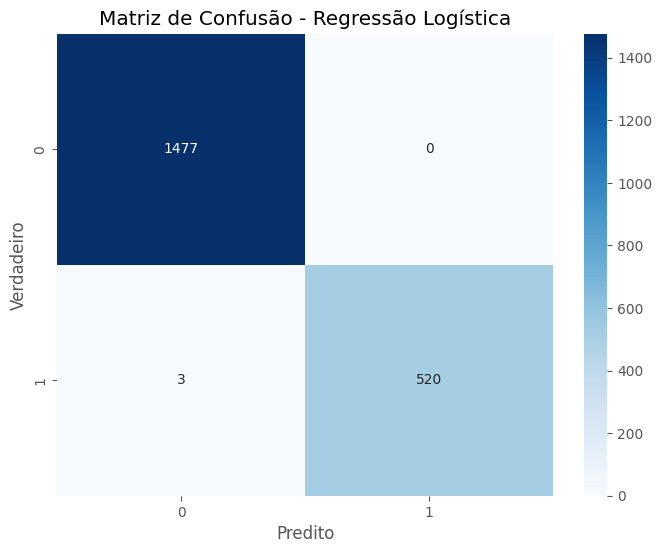

In [76]:
# Gerando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Regressão Logística')
plt.show()

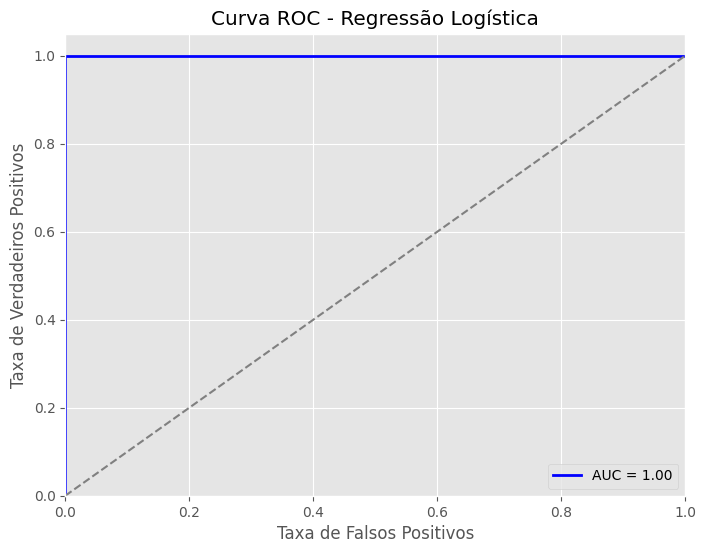

In [19]:
# Obter as pontuações de probabilidade para a classe positiva
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob_log_reg)

# Calcular a AUC
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Regressão Logística')
plt.legend(loc='lower right')
plt.show()

# Conclusão Final

Neste trabalho, comparamos diversos modelos de machine learning para classificar imóveis como "Luxury" ou "Basic" usando características numéricas. Regressão Logística, Random Forest, Gradient Boosting e AdaBoost apresentaram a melhor acurácia (0.9985), enquanto a Árvore de Decisão teve uma acurácia ligeiramente inferior (0.996). K-Nearest Neighbors, Support Vector Machine e Naive Bayes tiveram desempenho significativamente menor. Optamos pela Regressão Logística devido à sua alta interpretabilidade e excelente desempenho em métricas como F1-Score e AUC-ROC, adequadas para dados desbalanceados.

A análise dos coeficientes do modelo de Regressão Logística revelou que a presença de um quintal, ser recém-construído e ter um sótão grande são características que aumentam a probabilidade de um imóvel ser classificado como "Luxury". Em contraste, mais metros quadrados, número de quartos e andares adicionais, bem como um preço mais alto, curiosamente, diminuem essa probabilidade.

A matriz de confusão e a curva ROC confirmam o excelente desempenho do modelo de Regressão Logística, com uma alta taxa de acertos e uma excelente capacidade de discriminação entre as classes. Este modelo, portanto, se mostrou adequado tanto em termos de desempenho quanto de interpretabilidade.

Recomendamos futuras explorações para entender melhor as correlações inesperadas e experimentar técnicas de engenharia de características e balanceamento de classes para potencialmente melhorar ainda mais o desempenho. A comunicação dos resultados através de visualizações claras e relatórios detalhados também será crucial para orientar decisões estratégicas baseadas nos insights obtidos.